## Los Angeles Library Trends

In the latest episode of Data Skeptic, I talk through a fictitious problem of predicting whether or not a library book will be returned on time or not.  After hitting Publish, it occured to me that I should see if there is any actual data about the library in the LA Open Data portal.

As it turns out, the portal does not share the transaction level checkout data I was discussing in the episode, but the library does have several open datasets.

Most of them seem to be able most popular books and new books.  The most downloaded dataset is about library usage, so I thought a quick exploration of this dataset might be in order.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import requests
import json
import numpy as np
import pandas as pd

In [2]:
url = 'https://data.lacity.org/api/views/m4ev-cuzz/rows.json?accessType=DOWNLOAD'
r = requests.get(url)
jdata = json.loads(r.content)
columns_metadata = jdata['meta']['view']['columns']
colnames = map(lambda x: x['fieldName'], columns_metadata)

In [11]:
df = pd.DataFrame(data=jdata['data'], columns=colnames)
df.sort_values('date', inplace=1)
df.index = np.arange(df.shape[0])

Below is the distribution of visitors by month.  My original plan was to do some forecasting, but to be honest, this looks like a pretty flat usage to me.  The mean average of about 1,195,358 visitors per month is pretty consistent over this time period.  New information, but admittedly, boring information.

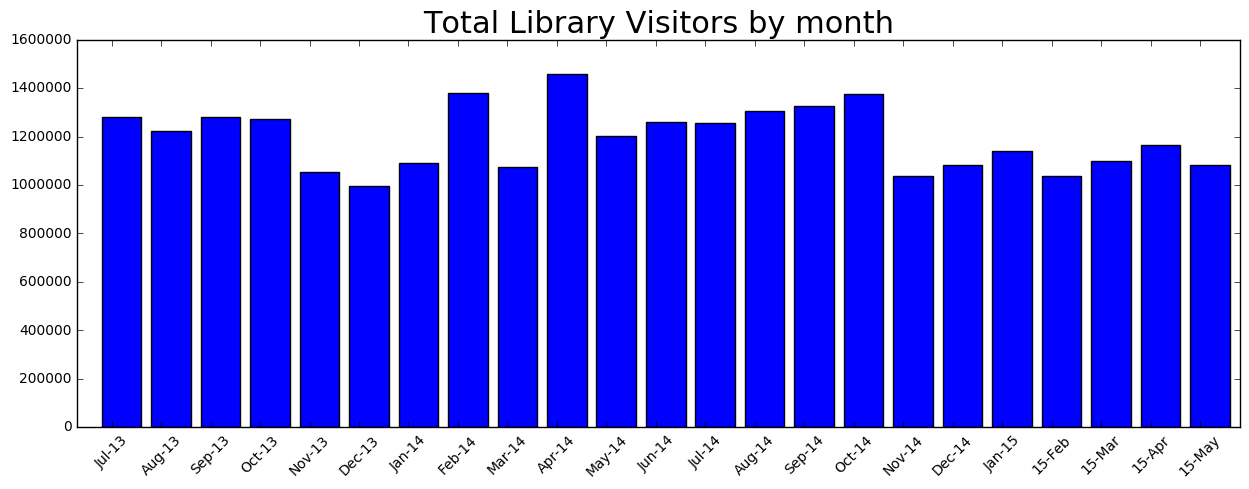

In [37]:
plt.figure(figsize=(15,5))
x = np.arange(df.shape[0])
plt.bar(x, df['total_library_visitors'])
plt.title('Total Library Visitors by month', fontsize=22)
plt.xticks(df.index+.2, df['month'], rotation=45)
plt.xlim(-.5, df.shape[0])
plt.show()

I poked around in a few other datums in this dataset.  Below are three time serieses over the same time period.  Its no surprise that volunteer hours are pretty constant.  I thought wifi sessions would be rising when it doesn't seem to be.  I was a bit surprised at the sudden rise in total emedia circulation, but this could very well be an artifact of how the services are being tracked or rolled out.

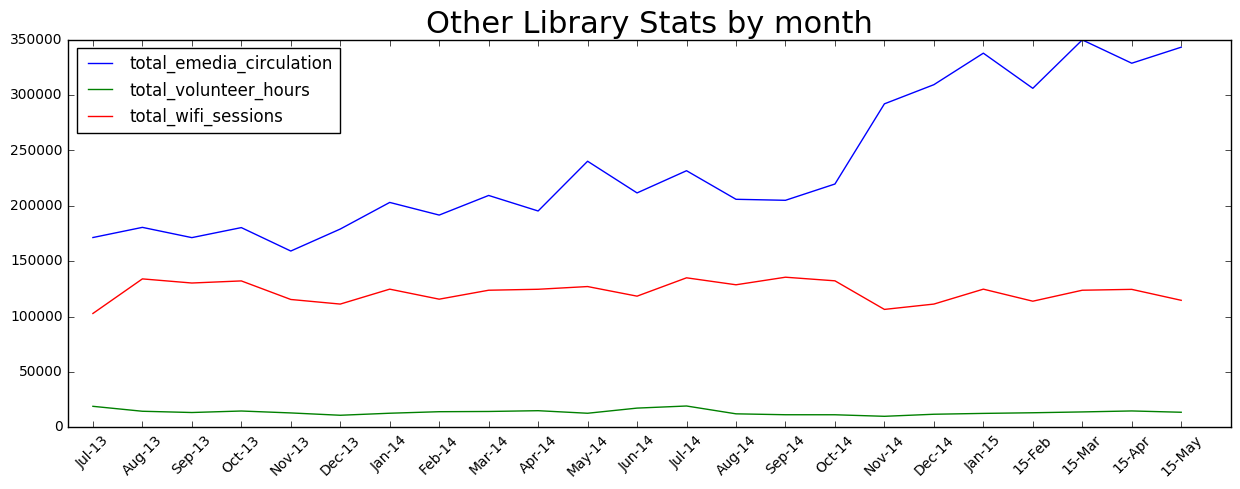

In [38]:
plt.figure(figsize=(15,5))
plt.plot(df['total_emedia_circulation'])
plt.plot(df['total_volunteer_hours'])
plt.plot(df['total_wifi_sessions'])
plt.title('Other Library Stats by month', fontsize=22)
plt.xticks(df.index, df['month'], rotation=45)
plt.xlim(-.5, df.shape[0])
plt.legend(loc=2)
plt.show()

While this dataset lacks any real source of clickbait, controversy, or deep insight, I'm still glad to see it's available in the open data portal.  For me, the most interesting takeaway is that the library seems rather... consistent.  A specious arguement could easily be built claiming a decline in library usage with the rise of electronic resources.  It seems the library shows no signs of decline.